

Data Collection


In [9]:
import pandas as pd

In [10]:
#load the dataseet
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [11]:
print(df.head()) #preview the first few rows

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [12]:
print(df.shape) # Check the shape rows * columns

(1470, 35)


In [13]:
print(df.info()) # Get data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
print(df.describe()) # summaries for numeric and categorical data

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

Data Cleaning

In [15]:
# check for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
# Drop irrelevent columns
df= df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)


In [17]:
# Convert categorical target to numerical
df['Attrition']= df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)


In [18]:
#check for duplicates
df=df.drop_duplicates()

In [19]:
#Handle any outliers
df['DistanceFromHome']=df['DistanceFromHome'].clip(upper=30)


In [20]:
#Preview cleaned data
print(df.describe())

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561 

Exploratory Data Analysis(EDA)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Attrition rate overview
print(df['Attrition'].value_counts(normalize=True))

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


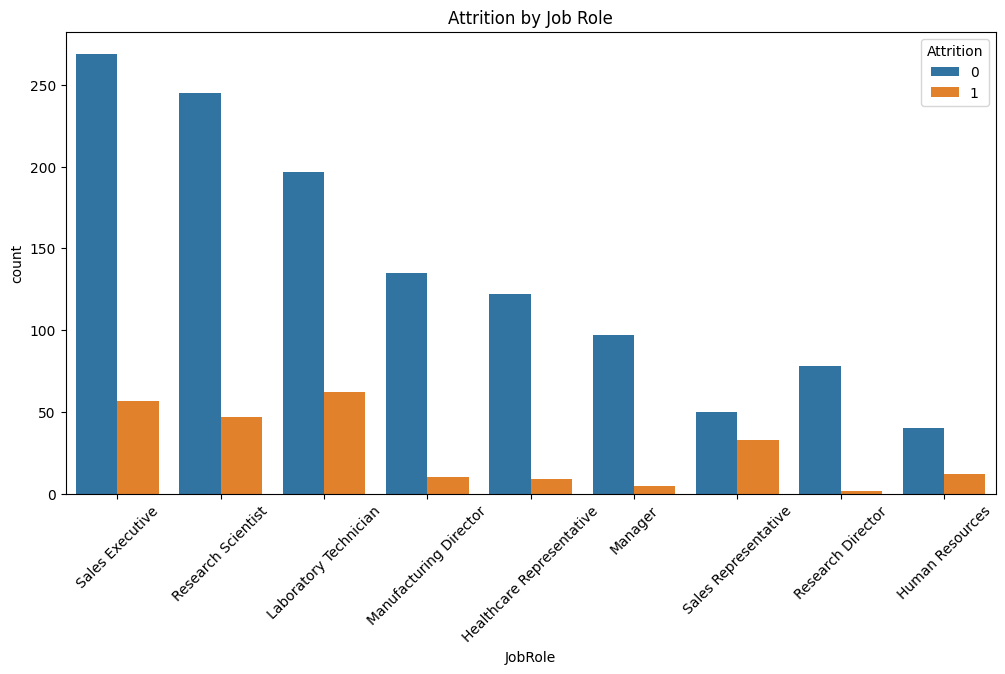

In [23]:
# Attrition by JobRole
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

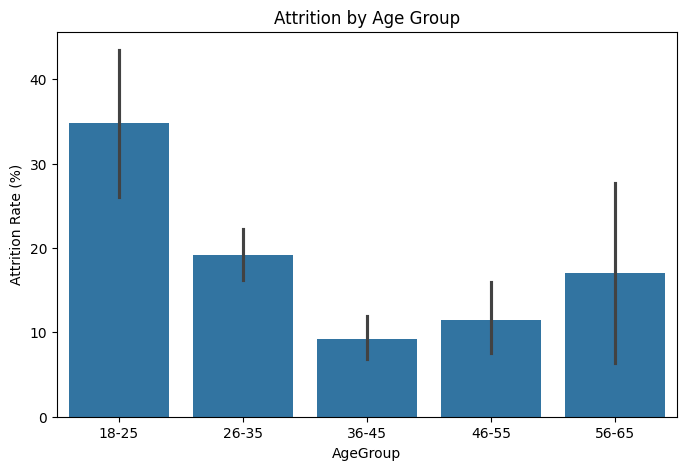

In [24]:
# Attrition by Age group
df['AgeGroup']=pd.cut(df['Age'], bins=[18,25,35,45,55,65,], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Attrition', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.ylabel('Attrition Rate (%)')
plt.title( 'Attrition by Age Group')
plt.show()

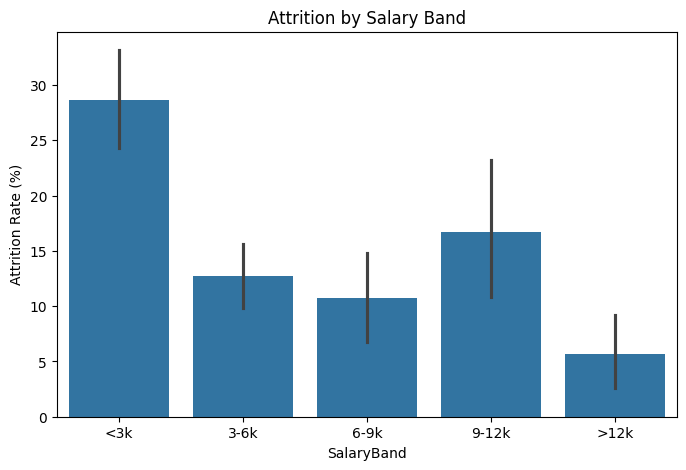

In [25]:
# Attrition by Salary band(MonthlyIncome)
df['SalaryBand']= pd.cut(df['MonthlyIncome'], bins=[0,3000,6000,9000,12000,20000], labels=['<3k','3-6k','6-9k','9-12k','>12k'])
plt.figure(figsize=(8,5))
sns.barplot(x='SalaryBand', y='Attrition', data=df, estimator= lambda x: sum(x)/len(x)*100)
plt.ylabel('Attrition Rate (%)')
plt.title("Attrition by Salary Band")
plt.show()

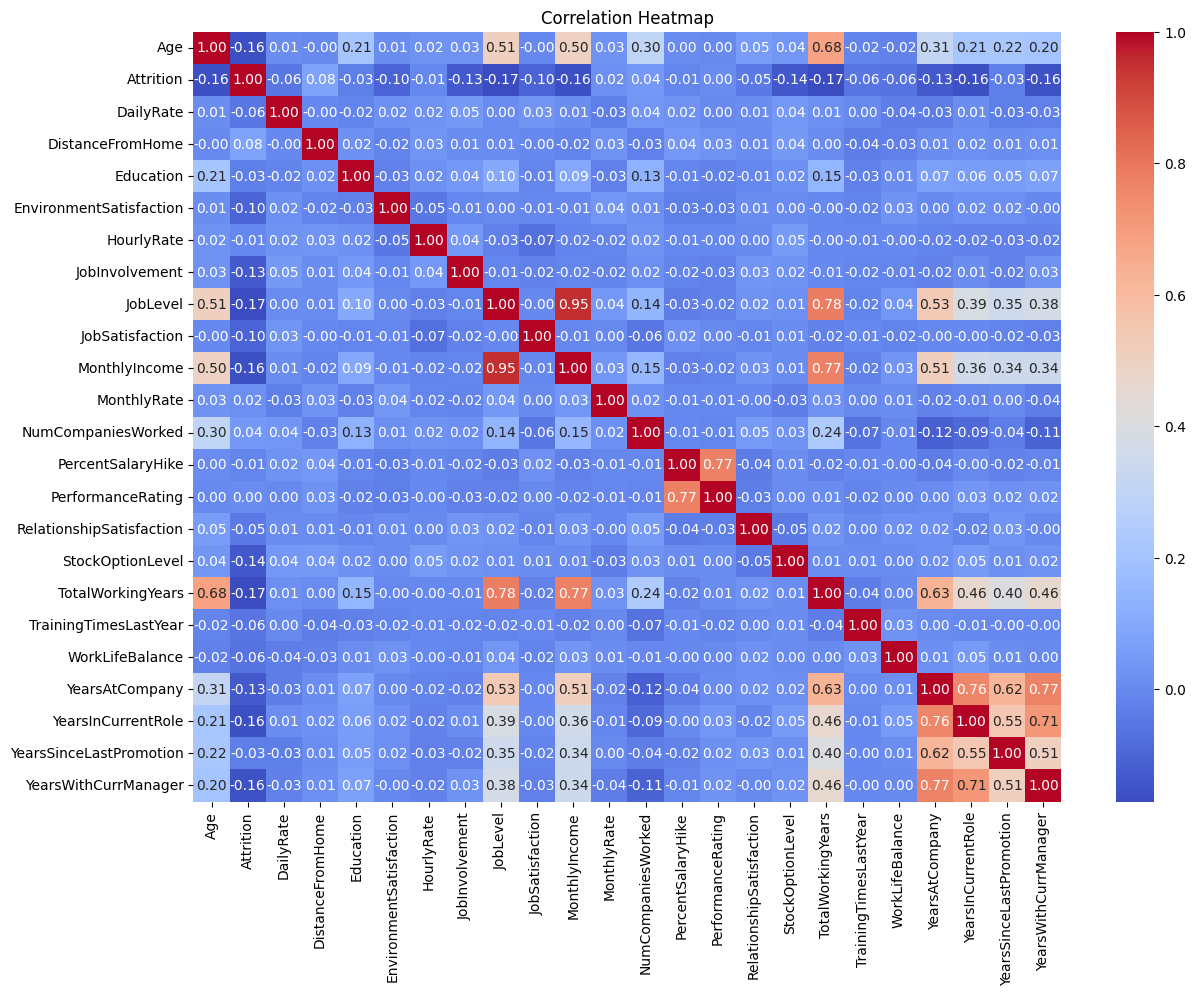

In [26]:
# Correlationn heatmap (numerical features only)
numerical_df=df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14,10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Encode categorical variables
categorical_cols=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_cols:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [29]:
#Scale numerical features
numerical_cols=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                  'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])
df=df.drop(['AgeGroup', 'SalaryBand'], axis=1, errors='ignore')


In [30]:
# split into features(X) and target (y)
X=df.drop('Attrition', axis=1)
y=df['Attrition']

In [32]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

Predictive Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [34]:
# Logistic Regression
lr= LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
print(f'Logistic Regression Accuracy:{accuracy_score(y_test, lr_pred):2f}')


Logistic Regression Accuracy:0.877551


In [36]:
# Random Forest
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
print(f'Random Forest Accuracy:{accuracy_score(y_test, rf_pred):.2f}')

Random Forest Accuracy:0.84


In [37]:
# Feature importance from Random Forest(top factors)
importance=pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance.head(10))

MonthlyIncome         0.073336
Age                   0.068557
TotalWorkingYears     0.065480
HourlyRate            0.054217
DailyRate             0.052526
MonthlyRate           0.051631
DistanceFromHome      0.049930
YearsAtCompany        0.043107
OverTime              0.038350
NumCompaniesWorked    0.035546
dtype: float64


In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score , roc_curve
#Confusion Matrix
cm= confusion_matrix(y_test, rf_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[240   7]
 [ 41   6]]


<Axes: >

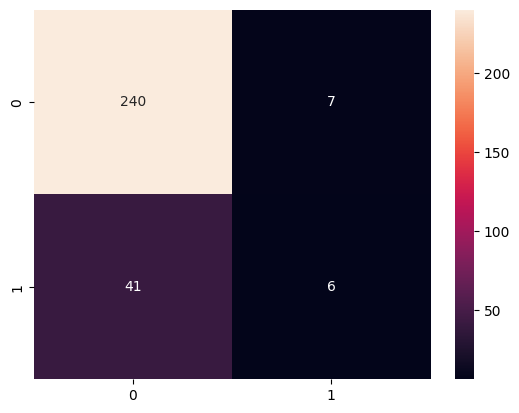

In [39]:
sns.heatmap(cm, annot=True, fmt='d')

In [40]:
#Precision, Recal
print(f'Precision: {precision_score(y_test, rf_pred):.2f}')
print(f'Recall:{ recall_score(y_test, rf_pred):.2f}')

Precision: 0.46
Recall:0.13


In [41]:
# roc curve and auc
fpr, tpr, _= roc_curve(y_test,rf.predict_proba(X_test)[:,1])
auc=roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC:{auc:.2f}')

ROC AUC:0.79


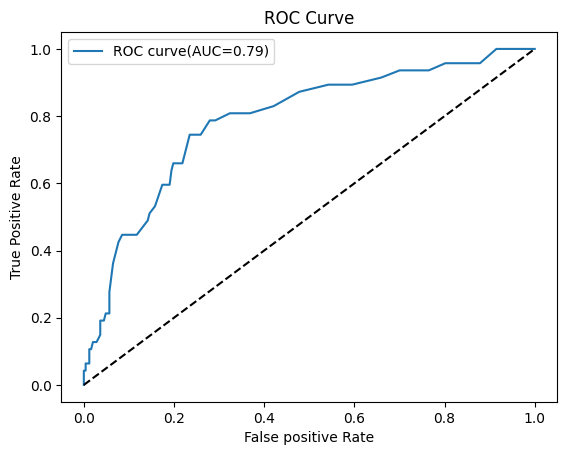

In [42]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve(AUC={auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Deployment

In [43]:
import joblib

In [45]:
# Save the trained model and preprocessor
joblib.dump(rf, 'attrition_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib')  # Save column order

print("Model, scaler, and columns saved successfully!")

Model, scaler, and columns saved successfully!
